# Investigating (Movies Database!)

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
<ul>
<li>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.</li>
<li>There are some odd characters in the ‘cast’ column.</li>
<li>Don’t worry about cleaning them.</li>
<li>You can leave them as is.</li>
<li>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>

### The questions we will investigate in this project are:
<ul>
    <li>How many movies released every 10 years (decades)?</li>
    <li>What are the movies which had most and least profit?</li>
    <li>What are the movies with largest and lowest budgets?</li>
    <li>What are the movies with most and least earned revenue?v
    <li>What are the movies with highest and lowest vote counts?</li>
    <li>What are the movies with the highest and lowest vote average?</li>
    <li>What are the movies with longest and shortest runtime?</li>
    <li>What are the movies average runtime of the movies?</li>
    <li>What is the historical Profitability through the years?</li>
    <li>What are the most and least profit years?</li>
    <li>What are the movies with 50M or more profit?</li>
    <li>What are the top 10 succesful Production Companies?</li>
    <li>What are the top 10 succesful Director?</li>
    <li>What are the top 10 succesful Genres?</li>
    <li>What are the top 10 succesful Stars from Cast?</li>
    <li>What are the average of each of the budget, revenue, and profit earned?</li>
</ul>

### The First step is to import libraries as we need on this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the project we will load, check, trim, and clean the database.

### General Properties

Here we loaded the database to be readable in the project

In [2]:
df = pd.read_csv("tmdb-movies.csv")
# This file doesn't contain duplicated records, so I have duplicate the file
# with some duplicated values in order to check the function
# df = pd.read_csv("noshowappointments-kagglev2-may-2016_DuplicationTest.csv")

Loading the first 3 rows in the database

In [3]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Loading the last 3 rows in the database

In [4]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


Getting the count of records and columns in the database

In [5]:
# Get the count on culomns and records in the database.
rows_count, columns_count = df.shape
print("This database contains the count of {:,} Columns for {:,} Records.".format(columns_count,rows_count))

This database contains the count of 21 Columns for 10,866 Records.


Getting the count of duplicated records in the database

In [6]:
# Check duplications in the database, and count them.
duplicated = df.duplicated().sum()
if duplicated == 0:
    print("This database doesn't contain any Duplicated Records.")
elif duplicated == 1:
    print("This database contain only {:,} Duplicated Record.".format(duplicated))
elif duplicated > 1:
    print("This database contain only {:,} Duplicated Records.".format(duplicated))

This database contain only 1 Duplicated Record.


Getting the count of unique records in this database.

In [7]:
# Check how many movies have records in this database.
unique_imdb_id = df['imdb_id'].nunique()
print("This database contain the sum of {:,} unique imdb id.".format(unique_imdb_id))

This database contain the sum of 10,855 unique imdb id.


Getting the count of duplicated by imdb id

In [8]:
# Check how many duplicated movies in this database.
duplicated_imdb_id = df['imdb_id'].duplicated().sum()
print("This database contain the sum of {:,} duplicated imdb id.".format(duplicated_imdb_id))

This database contain the sum of 10 duplicated imdb id.


Getting list of duplicated and sorted by imdb id

In [9]:
df.sort_values('imdb_id', inplace = True)
bool_series1 = df["imdb_id"].duplicated()
df[bool_series1]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000e+00,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000e+00,0.0


Getting list of duplicated and sorted by id

In [10]:
df.sort_values('id', inplace = True)
bool_series2 = df['id'].duplicated()
df[bool_series2]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Analyzing and Summarizing the findings for duplication in the database

In [11]:
# Check if the sum of the unique, and duplicated imdb ids are the same as records count.
if rows_count == unique_imdb_id + duplicated_imdb_id + duplicated:
    print('There are {:,} records in this database as below breakdown:\n >> {:,} unique imdb id\n \
>> {:,} duplicated records for those same imdb id\n >> {} duplicated \
row'.format(rows_count, unique_imdb_id, duplicated_imdb_id, duplicated))
elif rows_count != unique_imdb_id + duplicated_imdb_id:
    print('There is something wrong in this calculations as the records are not matching with \
the sum of the duplicate and unique records.')

There are 10,866 records in this database as below breakdown:
 >> 10,855 unique imdb id
 >> 10 duplicated records for those same imdb id
 >> 1 duplicated row


In [12]:
# Check how duplicated movies with the same data in this database.
duplicated_movies = df.duplicated(['imdb_id','original_title']).sum()
print("This database contains the sum of {:,} movies.".format(duplicated_movies))

This database contains the sum of 1 movies.


Inspecting for missing values in the database

In [13]:
# Inspection for missing values or any issue to be handled.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 8088 to 3460
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date     

### Overview Findings on the database

<ul>
    <li>9 records without imdb_id.</li>
    <li>1 record is duplicated.</li>
    <li>Minimal records without Cast, director, overview, or generes.</li>
    <li>Too many records without homepage, tagline, keywords, or production companies</li>
</ul>

#### Getting some information and statictics about the database like the Count, Mean, Min, Max, ... etc

In [14]:
# Getting some information and statictics about the database
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The oldest movie released on the year 1960, and the last released one in this database released on 2015.
Average duration of the movies is 102 minutes.
Average votes count is 217 for the movies, while the maximum is 9,767 votes, and the minimum is only 10 votes.


In [15]:
# Find the most voted movie.
mask=df.query('vote_count == 9767')
mask

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/10,9767,7.9,2010,160000000.0,825500000.0


In [16]:
# Find the least voted movies.
mask=df.query('vote_count == 10')
mask

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7204,26,tt0352994,0.192215,1400000,0,LaLehet Al HaMayim,Lior Ashkenazi|Knut Berger|Caroline Peters|Gid...,http://www.walkonwatermovie.com,Eytan Fox,He was trained to hate until he met the enemy.,...,"Eyal, an Israeli Mossad agent, is given the mi...",103,Drama,Lama Films|United King Films,2/5/04,10,6.4,2004,1.616224e+06,0.000000e+00
10134,248,tt0055312,0.290285,2900000,5000000,Pocketful of Miracles,Glenn Ford|Bette Davis|Hope Lange|Arthur O'Con...,NaN,Frank Capra,You have to see it to believe it!,...,"Damon Runyon's fairytale, sweet and funny, is ...",136,Comedy|Drama,Franton Production,12/18/61,10,6.1,1961,2.115510e+07,3.647431e+07
6957,286,tt0853060,0.013578,0,0,Deutschland. Ein SommermÃ¤rchen,Jens Lehmann|Arne Friedrich|Philipp Lahm|Torst...,NaN,SÃ¶nke Wortmann,NaN,...,A documentary of the German National soccer te...,107,Documentary,Little Shark Entertainment GmbH,10/3/06,10,7.3,2006,0.000000e+00,0.000000e+00
10450,751,tt0057334,0.628520,0,0,Murder at the Gallop,Margaret Rutherford|Stringer Davis|Robert Morl...,NaN,George Pollock,It's a Penny to a Pony... Murder Will Out!,...,Miss Marple and Mr Stringer are witness to the...,81,Drama|Thriller|Crime|Mystery|Comedy,Metro-Goldwyn-Mayer (MGM),1/1/63,10,5.4,1963,0.000000e+00,0.000000e+00
9891,758,tt0058382,0.371976,0,0,Murder Ahoy,Margaret Rutherford|Stringer Davis|Lionel Jeff...,NaN,George Pollock,New mischief amidst the mizzen-masts!,...,"During an annual board of trustees meeting, on...",93,Drama|Thriller|Crime|Mystery|Comedy,Metro-Goldwyn-Mayer (MGM),6/1/64,10,6.7,1964,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,365717,tt4016250,0.082569,0,0,The Audition,Leonardo DiCaprio|Brad Pitt|Robert De Niro|Mar...,NaN,Martin Scorsese,A short film with big egos.,...,A short film promoting the opening of Melco-Cr...,16,Comedy,RatPac Entertainment|Melco-Crown Entertainment...,10/27/15,10,6.1,2015,0.000000e+00,0.000000e+00
528,369058,tt5210380,0.133921,0,0,Merry Kissmas,Karissa Staples|Brant Daugherty|Brittany Under...,NaN,Michael Feifer,NaN,...,Unwinding her relationship from a controlling ...,90,Romance|TV Movie,NaN,12/5/15,10,7.6,2015,0.000000e+00,0.000000e+00
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.000000e+00
569,371833,tt4974584,0.088764,0,0,Harry Price: Ghost Hunter,Rafe Spall|Cara Theobold|Tom Ward|Sophie Stant...,NaN,Alex Pillai,NaN,...,When MP's wife Grace Goodwin is found naked on...,90,Drama|Horror,Bentley Productions,12/27/15,10,5.3,2015,0.000000e+00,0.000000e+00


## Data Cleaning

### We will clean the database as below:
<ul>
    <li>Remove dulication</li>
    <li>Remove unused columns</li>
    <li>Changed the names of columns</li>
    <li>Replaced the zeros on Budget, Revenue, and Runtime with 'NAN'</li>
    <li>Changed the format of the release date to be standard date format</li>
    <li>Changed the format of the budget and the revenue to be int instead of float</li>
</ul>

In [17]:
# Removing the duplicated movie.
df.drop(index=2090,inplace=True)
# Getting same information about the database to assure that the duplicated movie have been dropped.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 8088 to 3460
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date     

In [18]:
# Amendment of the column names
df.rename(columns={'budget_adj':'budget_adjustment'},inplace=True)
df.rename(columns={'revenue_adj':'revenue_adjustment'},inplace=True)
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adjustment,revenue_adjustment
8088,5,tt0113101,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,NaN,Allison Anders|Alexandre Rockwell|Robert Rodri...,Twelve outrageous guests. Four scandalous requ...,...,It's Ted the Bellhop's first night on the job....,98,Comedy,Miramax Films|A Band Apart,12/25/95,293,6.4,1995,5.723867e+06,6.153158e+06
10249,6,tt0107286,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,NaN,Stephen Hopkins,Don't move. Don't whisper. Don't even breathe.,...,"While racing to a boxing match, Frank, Mike, J...",110,Action|Thriller|Crime,Largo Entertainment|JVC Entertainment Networks,10/15/93,36,6.4,1993,0.000000e+00,1.832034e+07
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09


In [19]:
# Check how many duplicated patients in this database.
duplicated_imdb_id = df['imdb_id'].duplicated().sum()
print("This database contain the sum of {:,} duplicated imdb id now after dropping the duplicated row.".format(duplicated_imdb_id))

This database contain the sum of 9 duplicated imdb id now after dropping the duplicated row.


In [20]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adjustment,revenue_adjustment
8088,5,tt0113101,1.23489,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,NaN,Allison Anders|Alexandre Rockwell|Robert Rodri...,Twelve outrageous guests. Four scandalous requ...,...,It's Ted the Bellhop's first night on the job....,98,Comedy,Miramax Films|A Band Apart,12/25/95,293,6.4,1995,5.723867e+06,6.153158e+06


In [21]:
# Deleting the 'imdb_id', 'homepage', 'keywords', 'overview', and 'tagline' columns from the database
df = df.drop(columns=['imdb_id', 'homepage', 'keywords', 'overview', 'tagline'])
#now take a look at this new dataset
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adjustment,revenue_adjustment
8088,5,1.23489,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,98,Comedy,Miramax Films|A Band Apart,12/25/95,293,6.4,1995,5.723867e+06,6.153158e+06


<a id='eda'></a>
## Exploratory Data Analysis

### Deviding the data into decades

In [22]:
# Dividing the movies to multiple groups according to the releasing year during each 10 years.
sixties = df[df['release_year'].between(1960,1969)]
seventies = df[df['release_year'].between(1970,1979)]
eighties = df[df['release_year'].between(1980,1989)]
nineties = df[df['release_year'].between(1990,1999)]
twenties = df[df['release_year'].between(2000,2009)]
tenth = df[df['release_year'].between(2010,2019)]

In [23]:
# Assuring that the figures are correct.
len(sixties + seventies + eighties + nineties + twenties + tenth) == rows_count - duplicated

True

In [24]:
decades = {
    'sixties 1960s': len(sixties),
    'seventies 1970s': len(seventies),
    'eighties 1980s': len(eighties),
    'nineties 1990s': len(nineties),
    'twenties 2000s': len(twenties),
    'tenth 2010s': len(tenth)
}
decades_names = ['1960s','1970s','1980s','1990s','2000s','2010s']
decades_values = [len(sixties),len(seventies),len(eighties),len(nineties),len(twenties),len(tenth)]
decades,decades_names,decades_values

({'sixties 1960s': 362,
  'seventies 1970s': 508,
  'eighties 1980s': 1063,
  'nineties 1990s': 1765,
  'twenties 2000s': 3562,
  'tenth 2010s': 3605},
 ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'],
 [362, 508, 1063, 1765, 3562, 3605])

In [25]:
first_mil = sum(decades_values[0:4])
second_mil = sum(decades_values[4:6])
first_mil_ratio = first_mil / (first_mil + second_mil) * 100
second_mil_ratio = second_mil / (first_mil + second_mil) * 100
print ("During 1900s only around {} movies \
with the ratio of {:.0f}% from all movies in the database.".format(first_mil,first_mil_ratio))
print ("While 1900s movies are during {} years \
with the average of {:,.0f} movies per year.".format(2000-1960,first_mil/(2000-1960)))
print('\n')
print ("During 2000s only around {} movies \
with the ratio of {:.0f}% have been released of all movies in the database.".format(second_mil,second_mil_ratio))
print ("While 2000s movies are during ***ONLY*** {} years\
with the average of {:,.0f} movies per year.".format(2015-2000,second_mil/(2015-2000)))

During 1900s only around 3698 movies with the ratio of 34% from all movies in the database.
While 1900s movies are during 40 years with the average of 92 movies per year.


During 2000s only around 7167 movies with the ratio of 66% have been released of all movies in the database.
While 2000s movies are during ***ONLY*** 15 yearswith the average of 478 movies per year.


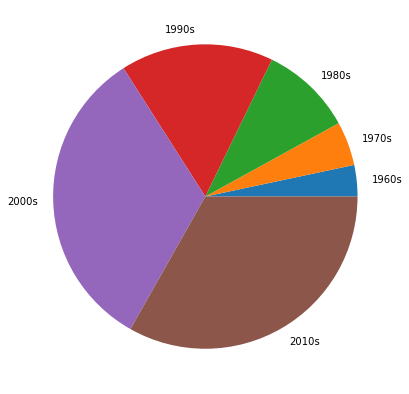

In [26]:
fig = plt.figure(figsize=(10,7))
plt.pie(decades_values, labels = decades_names)
plt.show()

34.03589427471161
65.96410274505615


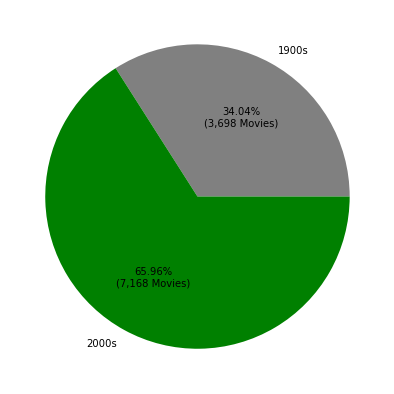

In [27]:
def my_format(x):
    print(x)
    return '{:.2f}%\n({:,.0f} Movies)'.format(x, rows_count*x/100)

fig = plt.figure(figsize=(10,7))
plt.pie((first_mil,second_mil), labels = ('1900s','2000s'), colors = ('grey','green'), autopct=my_format)
plt.show()

In [28]:
df.release_date = pd.to_datetime(df['release_date'])
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adjustment,revenue_adjustment
8088,5,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,98,Comedy,Miramax Films|A Band Apart,1995-12-25,293,6.4,1995,5.723867e+06,6.153158e+06
10249,6,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,Stephen Hopkins,110,Action|Thriller|Crime,Largo Entertainment|JVC Entertainment Networks,1993-10-15,36,6.4,1993,0.000000e+00,1.832034e+07
1329,11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09


Cleaning the runtime fields and replace the 0 with NAN to clean the data base.

In [29]:
#replacing 0 with NaN of runtime column in the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)

Cleaning the budget, revenue fields and replace the 0 with NAN and drop the records with null cells to clean the data base.

In [30]:
# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']
df[temp_list] = df[temp_list].replace(0, np.NAN)
df.dropna(subset = temp_list, inplace = True)
rows, col = df.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))

So after removing such entries, we now have only 3853 no.of movies.


In [31]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adjustment,revenue_adjustment
8088,5,1.234890,4000000.0,4300000.0,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,98.0,Comedy,Miramax Films|A Band Apart,1995-12-25,293,6.4,1995,5.723867e+06,6.153158e+06
1329,11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
4955,12,3.440519,94000000.0,864625978.0,Finding Nemo,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,100.0,Animation|Family,Walt Disney Pictures|Pixar Animation Studios|D...,2003-05-30,3692,7.4,2003,1.114231e+08,1.024887e+09


## Exploratory Data Analysis

### Calculating the profit of the each movie

In [32]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(4,'profit_earned',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,id,popularity,budget,revenue,profit_earned,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adjustment,revenue_adjustment
8088,5,1.234890,4000000.0,4300000.0,300000.0,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,98.0,Comedy,Miramax Films|A Band Apart,1995-12-25,293,6.4,1995,5.723867e+06,6.153158e+06
1329,11,12.037933,11000000.0,775398007.0,764398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09


### Creating a new function to calculate the highest and lowest values
for a specific column and get the records in vertical view

In [33]:
import pprint
#defining the function
def calculate(column):
    #The highest profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #the highest loss
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

### Movies which had most and least profit

Trying the Calculate function for Profit Earned Column

In [34]:
#calling the function
calculate('profit_earned')
    

,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,2781505847.0,11087569.0
profit_earned,2544505847.0,-413912431.0
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162.0,100.0
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


**"Avatar"** Movie shows the highest profit of around 2,544.5M, While **"The Warrior's Way"** Movie shows the loss of around 414M.

### Movies with largest and lowest budgets

In [35]:
# we will call the same function **calculate(column)** again for this analysis
calculate('budget')

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000.0,1.0
revenue,11087569.0,100.0
profit_earned,-413912431.0,99.0
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100.0,95.0
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


**"The Warrior's Way"** have the largest budget of **425,000,000** dollar, while **"Lost & Found"** shows the smallest budget of **1** dollar.

### Movies with most and least earned revenue

In [36]:
# we will call the same function **calculate(column)** again for this analysis
calculate('revenue')

,1386,8142
id,19995,2293
popularity,9.432768,0.552091
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
profit_earned,2544505847.0,-5999998.0
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
runtime,162.0,94.0
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy


**"Avatar"** have the largest revenue, while **"Mallrats"** is the lowest.

### Movies with highest and lowest vote counts

In [37]:
calculate('vote_count')

,1919,10134
id,27205,248
popularity,9.363643,0.290285
budget,160000000.0,2900000.0
revenue,825500000.0,5000000.0
profit_earned,665500000.0,2100000.0
original_title,Inception,Pocketful of Miracles
cast,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Glenn Ford|Bette Davis|Hope Lange|Arthur O'Con...
director,Christopher Nolan,Frank Capra
runtime,148.0,136.0
genres,Action|Thriller|Science Fiction|Mystery|Adventure,Comedy|Drama


Most voted movie is **'Inception'** and the least is **'Pocketful of Miracles'** while there are *another 500 records with the same value of 10 votes* only as above we mentioned.

### Calculating the highest and lowest vote average

In [38]:
calculate('vote_average')

,4178,4859
id,278,116977
popularity,7.192039,0.111351
budget,25000000.0,65000000.0
revenue,28341469.0,73706.0
profit_earned,3341469.0,-64926294.0
original_title,The Shawshank Redemption,Foodfight!
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Frank Darabont,Lawrence Kasanoff
runtime,142.0,87.0
genres,Drama|Crime,Animation|Action|Comedy|Family


The top voted movie is **'The Shawshank Redemption'** which is rated **8.4** and the least voted is **'Foodfight'** movie rated  only **2.2**.

### Movies with longest and shortest runtime

In [39]:
calculate('runtime')

,2107,5162
id,43434,24914
popularity,0.534192,0.208637
budget,18000000.0,10.0
revenue,871279.0,5.0
profit_earned,-17128721.0,-5.0
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338.0,15.0
genres,Crime|Drama|Thriller|History,Science Fiction|Animation


**"Carlos"** Movie shows the longest runtime **338 minutes**, while **"Kid's Story"** shows the shortest runtime **15 minutes**.

### Year of release vs Profitability

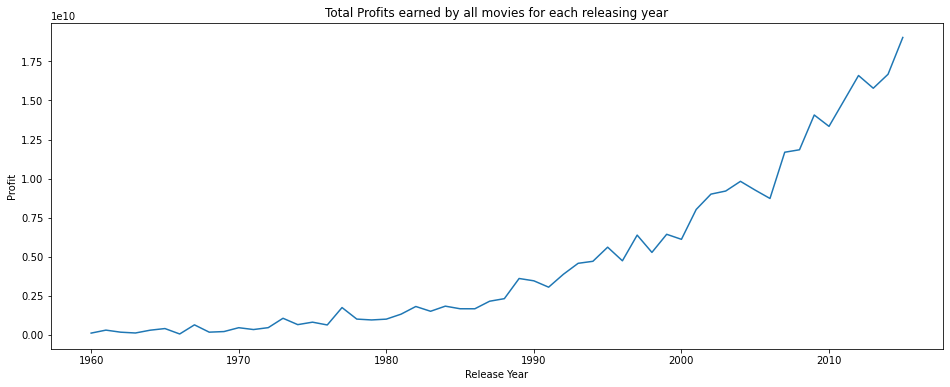

In [40]:
# Profit vs year of release
profits_year = df.groupby('release_year')['profit_earned'].sum()
plt.figure(figsize=(16,6))
plt.xlabel('Release Year')
plt.ylabel('Profit')
plt.title('Total Profits earned by all movies for each releasing year')
plt.plot(profits_year)
plt.show()

The profit ears are going higher with time as you can see in the above graph.

### The most profit year

In [41]:
#Which year made the highest profit?
profits_year.idxmax()

2015

### The least profit year

In [42]:
profits_year.idxmin()

1966

The most profit year is 2015 and the least is 1966.

### Movies with 50M or more profit.

In [43]:
#selecting the movies having profit $50M or more
profit_data = df[df['profit_earned'] >= 50000000]
profit_data.index = range(len(profit_data))
profit_data.index = profit_data.index + 1
profit_data.head(3)

,id,popularity,budget,revenue,profit_earned,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adjustment,revenue_adjustment
1,11,12.037933,11000000.0,775398007.0,764398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
2,12,3.440519,94000000.0,864625978.0,770625978.0,Finding Nemo,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,100.0,Animation|Family,Walt Disney Pictures|Pixar Animation Studios|D...,2003-05-30,3692,7.4,2003,1.114231e+08,1.024887e+09
3,13,6.715966,55000000.0,677945399.0,622945399.0,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,142.0,Comedy|Drama|Romance,Paramount Pictures,1994-07-06,4856,8.1,1994,8.091114e+07,9.973333e+08


#### A new function which will split the data in each cell

In [44]:
def data(column):
    data = profit_data[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

### Succesful Production Companies

In [45]:
#variable to store the retured value
count = data('production_companies')
count.head(10)

Universal Pictures                        156
Warner Bros.                              144
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    118
Columbia Pictures                          93
Walt Disney Pictures                       78
New Line Cinema                            67
Columbia Pictures Corporation              51
Relativity Media                           50
Touchstone Pictures                        46
dtype: int64

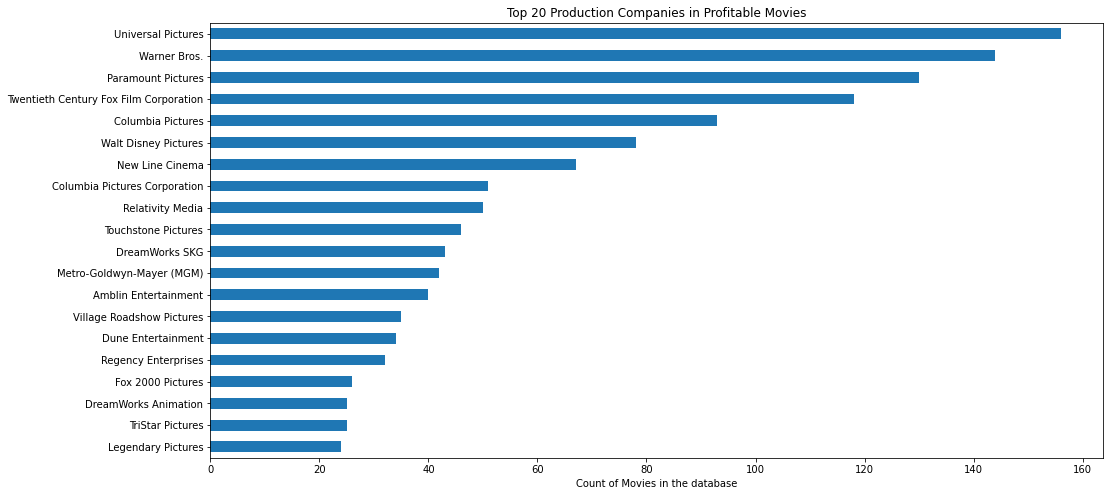

In [46]:
ax = count.iloc[:20].plot(kind="barh")
ax.set(title = 'Top 20 Production Companies in Profitable Movies')
ax.set_xlabel('Count of Movies in the database')
ax.figure.set_size_inches(16, 8)
ax.invert_yaxis()

### Succesful Director

In [47]:
#variable to store the retured value
count = data('director')
count.head(10)

Steven Spielberg      23
Robert Zemeckis       13
Clint Eastwood        12
Tim Burton            11
Tony Scott            10
Ron Howard            10
Ridley Scott          10
Michael Bay            9
David Fincher          8
M. Night Shyamalan     8
dtype: int64

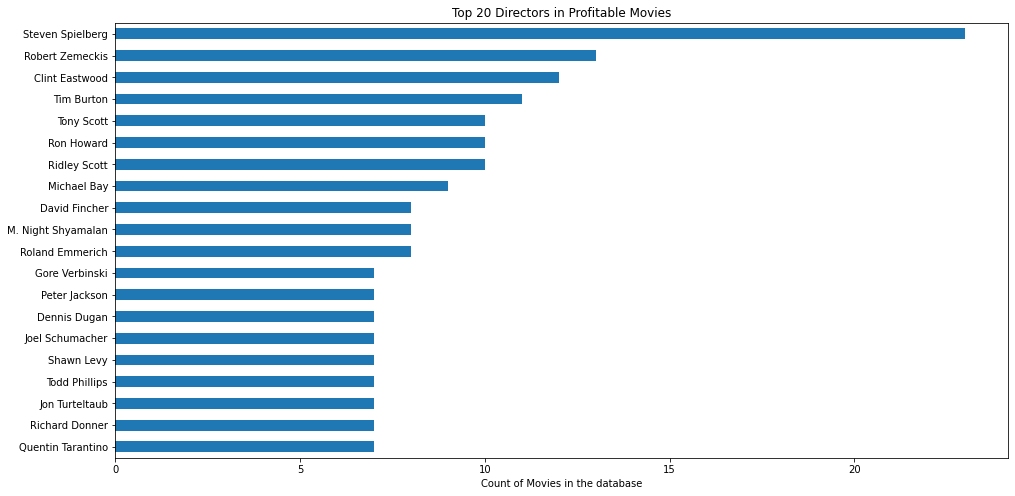

In [48]:
ax = count.iloc[:20].plot(kind="barh")
ax.set(title = 'Top 20 Directors in Profitable Movies')
ax.set_xlabel('Count of Movies in the database')
ax.figure.set_size_inches(16, 8)
ax.invert_yaxis()

### Succesful Genres

In [49]:
#variable to store the retured value
count = data('genres')
count.head(10)

Comedy             492
Drama              481
Action             464
Thriller           405
Adventure          379
Family             229
Romance            215
Science Fiction    206
Fantasy            201
Crime              193
dtype: int64

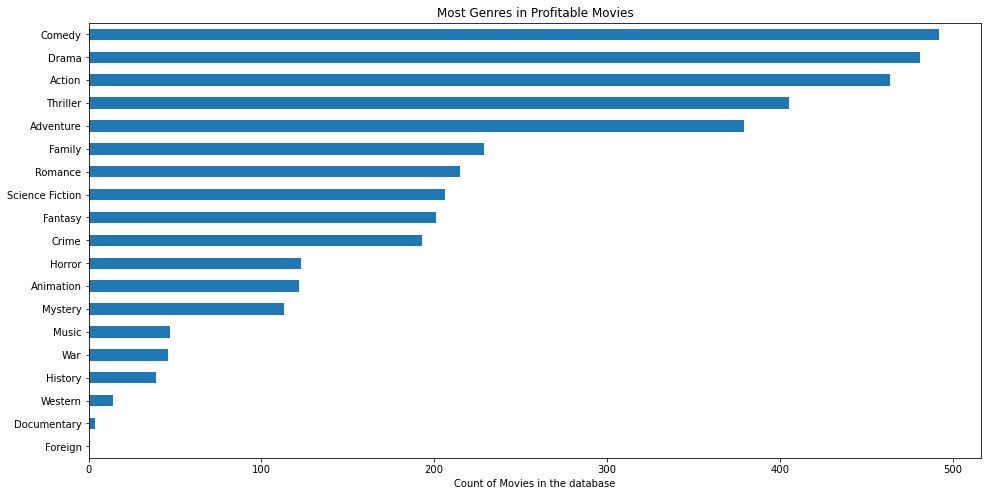

In [50]:
#Create a descending order plot for genres from top to bottom
count.sort_values(ascending = True, inplace = True)
lt = count.plot.barh()
lt.set(title = 'Most Genres in Profitable Movies')
lt.set_xlabel('Count of Movies in the database', color = 'black')
lt.figure.set_size_inches(16, 8)
plt.show()

### Most Frequent Star

In [51]:
#variable to store the retured value
count = data('cast')
count.head(10)

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
Robert De Niro        19
Bruce Willis          19
Jim Carrey            19
Adam Sandler          19
Harrison Ford         19
dtype: int64

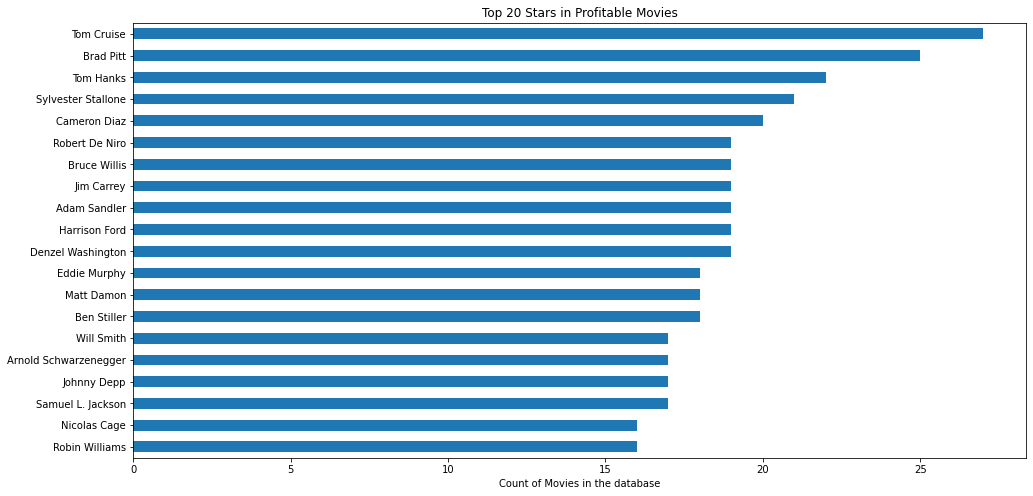

In [52]:
ax = count.iloc[:20].plot(kind="barh")
ax.set(title = 'Top 20 Stars in Profitable Movies')
ax.set_xlabel('Count of Movies in the database')
ax.figure.set_size_inches(16, 8)
ax.invert_yaxis()

### New function to find average as integer

In [53]:
#New function to find average 
def calculate_avg(column):
    return int(df[column].mean())

### Average Budget

In [54]:
calculate_avg('budget')

37203696

Average Budget is 37,203,696

### Average Revenue

In [55]:
calculate_avg('revenue')

107686616

Average revenue is 107,686,616

### Average Profit Earned

In [56]:
calculate_avg('profit_earned')

70482919

Average Profit is 70,482,919

### Average Runtime

In [57]:
calculate_avg('runtime')

109

Average runtime is 109

#### Analyzing the duration of the movies

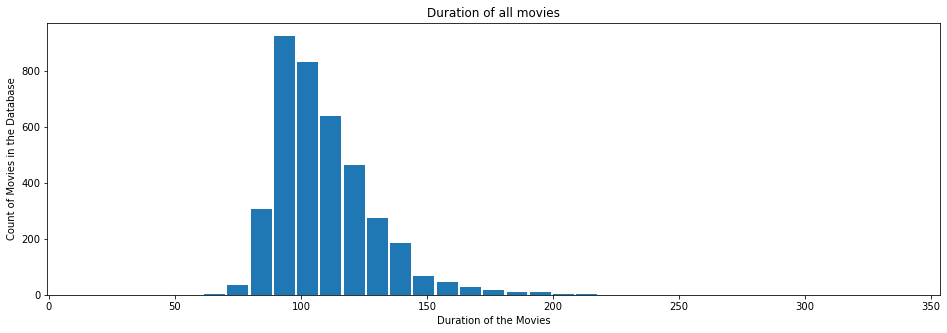

In [58]:
# Creating a Plot of runtime of all movies
plt.figure(figsize=(16,5))
plt.xlabel('Duration of the Movies')
plt.ylabel('Count of Movies in the Database')
plt.title('Duration of all movies')
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
plt.show()

C:\Users\WiSHa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\WiSHa\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


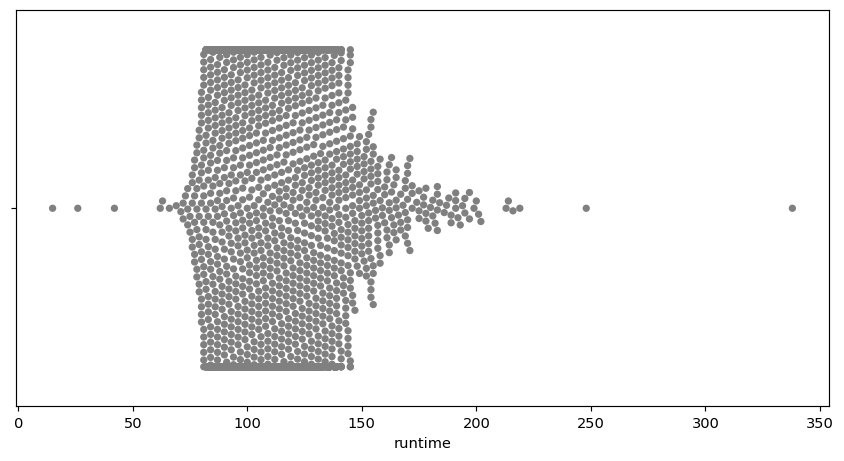

In [59]:
#plots the data points of runtime of movies

#giving figure size
plt.figure(figsize=(10,5), dpi = 105)

sns.swarmplot(df['runtime'], color = 'grey')
plt.show()

The analysis shows that the most movies duration are around 90 to 110 minutes.

<a id='conclusions'></a>
## Conclusions

<ul>
<li>The movies production is moving forward and every year we release more movies than the last year.</li>
<li>Taken Movie is recorded twice.</li>
<li>Minimal records without Cast, director, overview, or generes.</li>
<li>Too many records without homepage, tagline, keywords, or production companies</li>
<li>Inception is the most movie voted for with the count of 9,767 votes.</li>
<li>The least voted movies are 501 movies with only 10 votes each.</li>
<li>During 1900s only around 3698 movies with the ratio of 34% from all movies in the database, While 1900s movies are during 40 years with the average of 92 movies per year.</li>
<li>During 2000s only around 7167 movies with the ratio of 66% have been released of all movies in the database, While 2000s movies are during ***ONLY*** 15 years with the average of 478 movies per year.</li>
<li>"Avatar" Movie shows the highest profit of around 2,544.5M, While "The Warrior's Way" Movie shows the loss of around 414M.</li>
<li>"The Warrior's Way" have the largest budget of 425,000,000 dollar, while "Judgment Night" shows the smallest budget of 0 dollar.</li>
<li>"Avatar" have the largest revenue, while "Mallrats" is the lowest.</li>
<li>"Carlos" Movie shows the longest runtime 338 minutes, while "Kid's Story" shows the shortest runtime 15 minutes.</li>
<li>So the average runtime a movie is 109 minutes.</li>
<li>The average duration of the movies is around 100 minutes or mostly less by some little minutes.</li>
<li>The highest profit was in 2015, which is the last year in the existing database and the least was in 1966.</li>
<li>Star Wars, Finding Nemo, and Forrest Gump have 50M profit or more.</li>
<li>The most used genre is Comedy.</li>
<li>Most frequent star is Tom Cruise.</li>
</ul>